<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#标准化" data-toc-modified-id="标准化-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>标准化</a></span></li><li><span><a href="#z-score标准化" data-toc-modified-id="z-score标准化-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>z-score标准化</a></span><ul class="toc-item"><li><span><a href="#平均值→方差→标准差" data-toc-modified-id="平均值→方差→标准差-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>平均值→方差→标准差</a></span><ul class="toc-item"><li><span><a href="#协方差(二维)" data-toc-modified-id="协方差(二维)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>协方差(二维)</a></span></li><li><span><a href="#协方差矩阵(多维)" data-toc-modified-id="协方差矩阵(多维)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>协方差矩阵(多维)</a></span></li></ul></li><li><span><a href="#代码实现" data-toc-modified-id="代码实现-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>代码实现</a></span></li></ul></li></ul></div>

# 标准化

目的：简化计算，使梯度下降更快收敛

方法：统一范围。原始数据标准化后，各指标处于同一数量级。比如将特征值约束到 [−1，+1]

归一化将有量纲的表达式，化为无量纲，成为标量

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

# z-score标准化
$$z=\frac{x-\bar{x}}{σ}$$

- 适用于属性的最大值和最小值未知，或有超出取值范围的离群数据的情况
- 大于平均值 (0) 的数据会得到一个正的标准化数值
- 标准化后，数据只是密集了，相对分布不变

## 平均值→方差→标准差

平均值：$\bar{x} = \frac{1}{n}\sum_{k=1}^ {n}x_{k}$

加权平均：$\bar{x} = \frac{x_{1}w_{1}+x_{2}w_{2}+…+x_{n}w_{n}} {w_{1}+w_{2}+…+w_{n}}$

期望：$E(X) = \sum_{i=1}p_{i}x_{i}$  ( 加概率平均，∑p = 1)

方差：$\sigma = \sqrt {\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\bar{x})^2}$

标准差：$S = \sqrt {\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\bar{x})^2}$

样本标准差：$S = \sqrt {\frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\bar{x})^2}$



- 标准差
    - 表示分散程度，数据的波动性
    - 一般是用来描述一维数据的(协方差两个随机变量关系)
- 样本标准差除以n-1
    - 当你选择一个样本后，相比总体，你拥有数据的数量是变少了，很有可能极端的数值没有了，这样使得数值更有可能以更紧密的方式聚集在均值周围。也就是说，样本的标准差要小于总体标准差。
    除以n-1，就使得标准差略大。

numpy.std( ddof=0 ) 默认除以 n (总体方差)

pandas.std( ddof=1)  默认除以n-1 (样本方差)

### 协方差(二维)

$$cov(X,Y)=\frac{\sum_{i=1}^n (X_{i}-\bar{X})(Y_{i}-\bar{Y})}{n}$$

协方差结果为正，则说明两者是正相关

### 协方差矩阵(多维)

$$C_{n\times n}=(c_{i,j},c_{i,j}=cov(Dim_{i},Dim_{j})$$

## 代码实现


std =  14.038043548396146


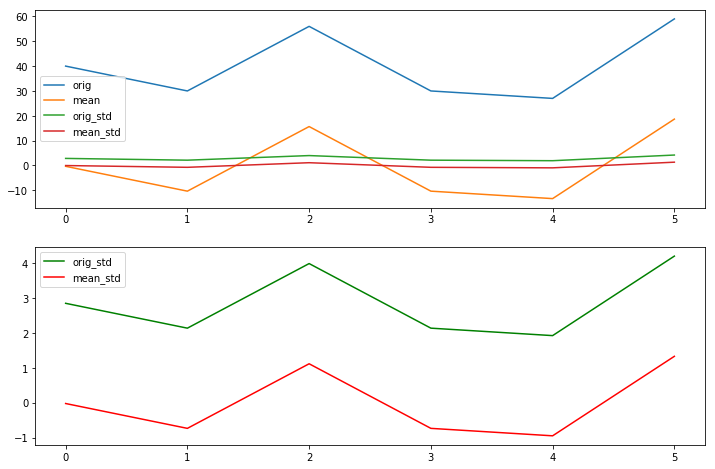

In [64]:
x = range(6)
data = pd.DataFrame([40, 30, 56, 30, 27, 59])
data_mean = data- data.mean()
data_std = data.std()
dataorig_std = data/data.std()
datamean_std = data_mean/data.std()

fig,ax = plt.subplots(2,figsize=(12,8))
ax[0].plot(x,data,label='orig')
ax[0].plot(x,data_mean,label='mean')
ax[0].plot(x,dataorig_std,label='orig_std')
ax[0].plot(x,datamean_std,label='mean_std')
ax[0].legend()

ax[1].plot(x,dataorig_std,label='orig_std',color='g')
ax[1].plot(x,datamean_std,label='mean_std',color='r')
plt.legend()
print('std = ', data_std[0])
plt.show()